In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam # - Works
import random
from glob import glob
import seaborn as sns
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
import matplotlib.image as img
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
try:
    tf.config.experimental.set_memory_growth = True
except Exception as ex:
    print(e)

[]


In [3]:
data_dir_train = pathlib.Path(r'C:\Users\Sakshi\OneDrive\Desktop\Skin Cancer Data\Skin cancer ISIC The International Skin Imaging Collaboration\Train')
data_dir_test = pathlib.Path(r"C:\Users\Sakshi\OneDrive\Desktop\Skin Cancer Data\Skin cancer ISIC The International Skin Imaging Collaboration\Test")

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

780
144


In [5]:
batch_size = 32
img_height = 180
img_width = 180
rnd_seed = 123
random.seed(rnd_seed)

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 780 files belonging to 9 classes.
Using 624 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 780 files belonging to 9 classes.
Using 156 files for validation.


In [1]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  validation_split=0.9,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

NameError: name 'tf' is not defined

In [9]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


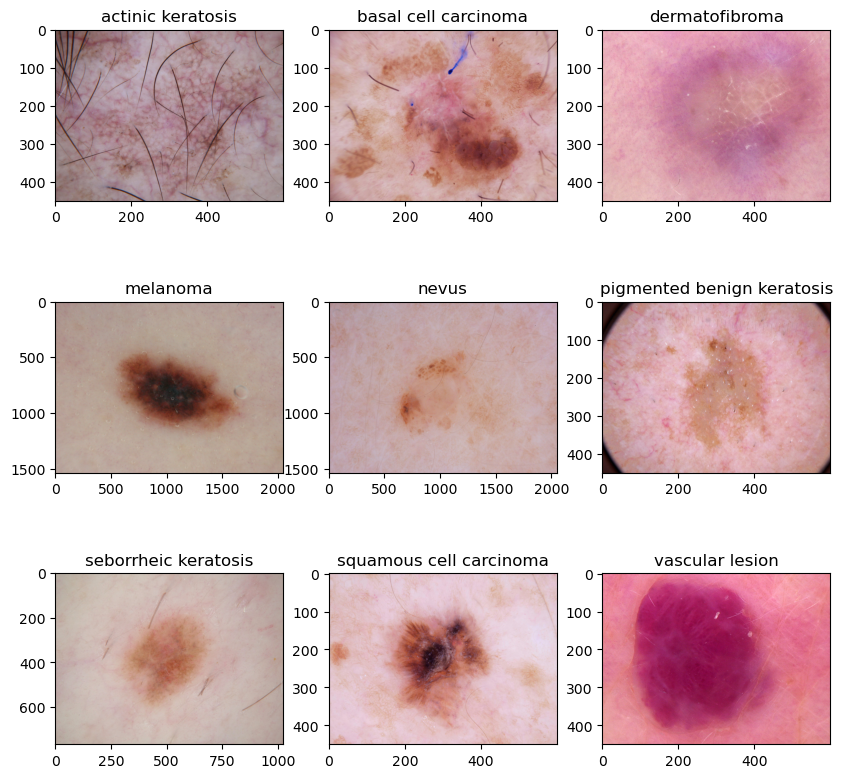

In [10]:
num_classes = len(class_names)
plt.figure(figsize=(10,10))
for i in range(num_classes):
  plt.subplot(3,3,i+1)
  image = img.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [11]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 180, 180, 3)
(32,)


In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Model 1 : STD model

In [13]:
num_classes = 9
model = Sequential([layers.experimental.preprocessing.Rescaling \
                    (1.0/255,input_shape=(img_height,img_width,3))])

model.add(Conv2D(32, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(128, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(256, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(512, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(units=num_classes, activation= 'softmax'))

In [14]:
opt = Adam(lr=0.001)
model.compile(optimizer= opt,
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       7

In [18]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
20/20 [==============================] - 12s 589ms/step - loss: 1.3534 - accuracy: 0.4583 - val_loss: 1.3434 - val_accuracy: 0.4615
Epoch 2/25
20/20 [==============================] - 12s 575ms/step - loss: 1.2358 - accuracy: 0.5160 - val_loss: 1.2889 - val_accuracy: 0.4936
Epoch 3/25
20/20 [==============================] - 15s 748ms/step - loss: 1.2872 - accuracy: 0.5080 - val_loss: 1.3014 - val_accuracy: 0.5192
Epoch 4/25
20/20 [==============================] - 14s 718ms/step - loss: 1.1940 - accuracy: 0.5337 - val_loss: 1.2115 - val_accuracy: 0.5256
Epoch 5/25
20/20 [==============================] - 14s 712ms/step - loss: 1.0625 - accuracy: 0.5721 - val_loss: 1.2132 - val_accuracy: 0.4936
Epoch 6/25
20/20 [==============================] - 14s 713ms/step - loss: 1.0755 - accuracy: 0.5801 - val_loss: 1.2379 - val_accuracy: 0.5256
Epoch 7/25
20/20 [==============================] - 14s 712ms/step - loss: 0.9094 - accuracy: 0.6490 - val_loss: 1.2811 - val_accuracy: 0.5385

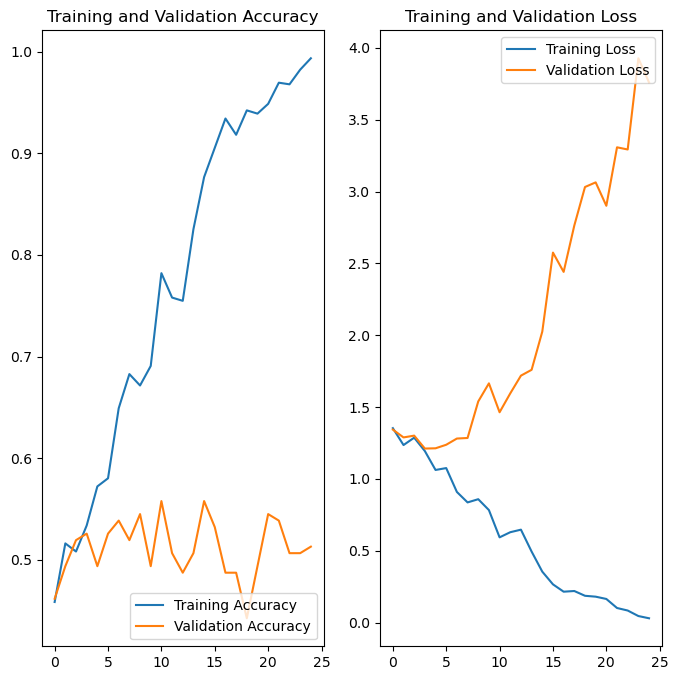

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## data Augmentation with drop out layer

In [20]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)

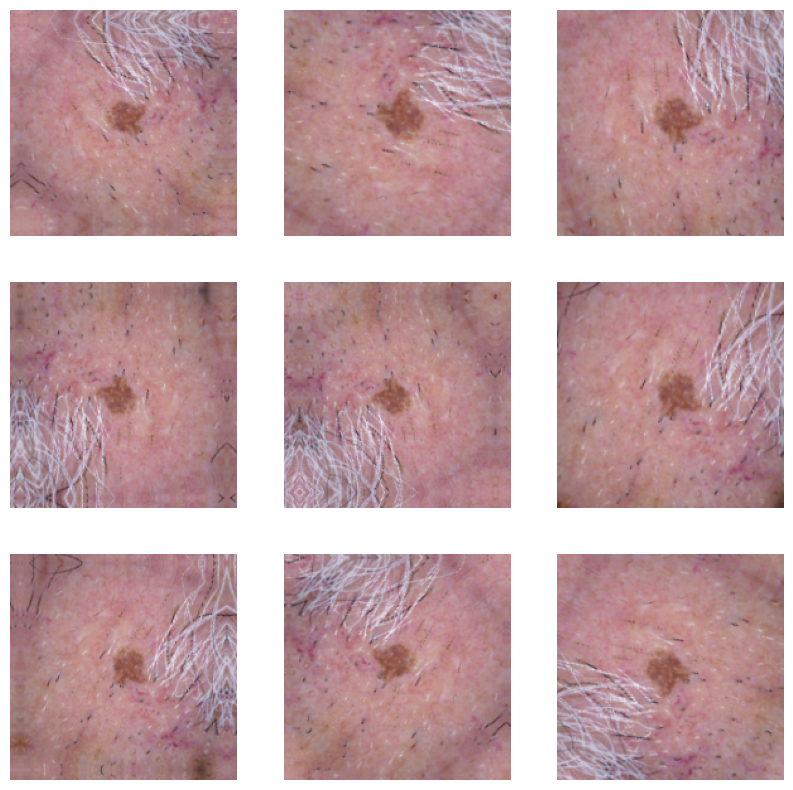

In [21]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [22]:
num_classes = 9
model = Sequential(data_augmentation)
model.add(layers.experimental.preprocessing.Rescaling(1.0/255,input_shape=(img_height,img_width,3)))

model.add(Conv2D(32, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(128, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.15))

model.add(Conv2D(256, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.20))

model.add(Conv2D(512, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(units=num_classes, activation= 'softmax'))

In [23]:
opt = Adam(lr=0.001)
model.compile(optimizer=opt,
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
20/20 [==============================] - 15s 647ms/step - loss: 2.2440 - accuracy: 0.1266 - val_loss: 2.1911 - val_accuracy: 0.0897
Epoch 2/25
20/20 [==============================] - 13s 651ms/step - loss: 2.1911 - accuracy: 0.1378 - val_loss: 2.1832 - val_accuracy: 0.0897
Epoch 3/25
20/20 [==============================] - 16s 787ms/step - loss: 2.1895 - accuracy: 0.1250 - val_loss: 2.1848 - val_accuracy: 0.1218
Epoch 4/25
20/20 [==============================] - 16s 783ms/step - loss: 2.1707 - accuracy: 0.1442 - val_loss: 2.0995 - val_accuracy: 0.1923
Epoch 5/25
20/20 [==============================] - 16s 785ms/step - loss: 2.0304 - accuracy: 0.1971 - val_loss: 1.9122 - val_accuracy: 0.2564
Epoch 6/25
20/20 [==============================] - 16s 780ms/step - loss: 1.9993 - accuracy: 0.2147 - val_loss: 1.8597 - val_accuracy: 0.3205
Epoch 7/25
20/20 [==============================] - 16s 789ms/step - loss: 1.8068 - accuracy: 0.2452 - val_loss: 1.7333 - val_accuracy: 0.3205

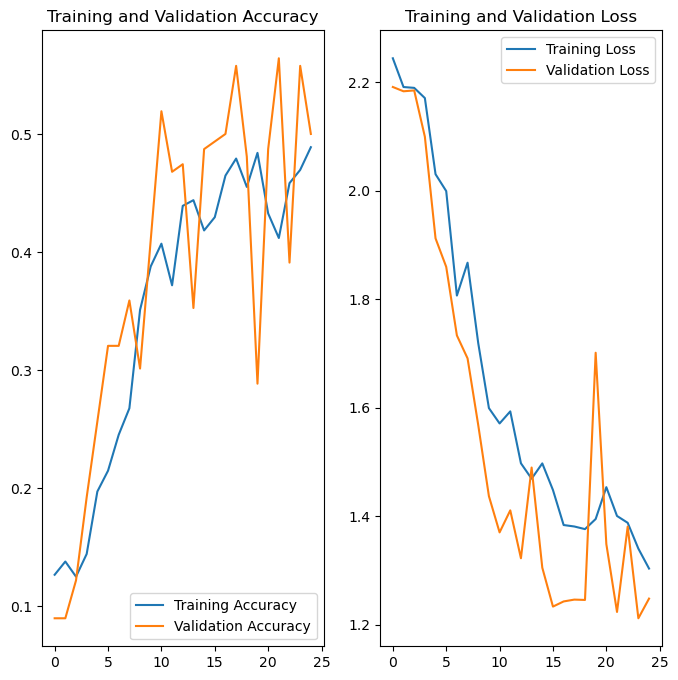

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

total training image count = 780 

-------------------------------------
Class name =  actinic keratosis
count      =  70
proportion =  0.08974358974358974
-------------------------------------
Class name =  basal cell carcinoma
count      =  100
proportion =  0.1282051282051282
-------------------------------------
Class name =  dermatofibroma
count      =  70
proportion =  0.08974358974358974
-------------------------------------
Class name =  melanoma
count      =  100
proportion =  0.1282051282051282
-------------------------------------
Class name =  nevus
count      =  100
proportion =  0.1282051282051282
-------------------------------------
Class name =  pigmented benign keratosis
count      =  100
proportion =  0.1282051282051282
-------------------------------------
Class name =  seborrheic keratosis
count      =  70
proportion =  0.08974358974358974
-------------------------------------
Class name =  squamous cell carcinoma
count      =  100
proportion =  0.1282051282051282


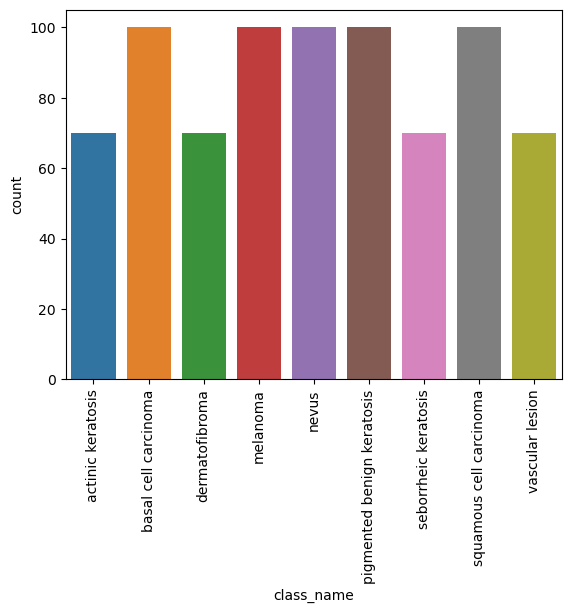

In [26]:
num_classes = len(class_names)
total = 0
all_count = []
class_name = []
for i in range(num_classes):
  count = len(list(data_dir_train.glob(class_names[i]+'/*.jpg')))
  total += count
print("total training image count = {} \n".format(total))
print("-------------------------------------")
for i in range(num_classes):
  count = len(list(data_dir_train.glob(class_names[i]+'/*.jpg')))
  print("Class name = ",class_names[i])
  print("count      = ",count)
  print("proportion = ",count/total)
  print("-------------------------------------")
  all_count.append(count)
  class_name.append(class_names[i])

temp_df = pd.DataFrame(list(zip(all_count, class_name)), columns = ['count', 'class_name'])
sns.barplot(data=temp_df, y="count", x="class_name")
plt.xticks(rotation=90)
plt.show()

In [27]:
!pip install Augmentor

  Obtaining dependency information for Augmentor from https://files.pythonhosted.org/packages/f3/86/5a91176650eb229ea2cd95551c34c36fba6cd95da3bdc4a5c73fbb1536ca/Augmentor-0.2.12-py2.py3-none-any.whl.metadata


In [33]:
import pathlib
import Augmentor

path_to_training_dataset = pathlib.Path(r'C:\Users\Sakshi\OneDrive\Desktop\Skin Cancer Data\Skin cancer ISIC The International Skin Imaging Collaboration\Train')

for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset.joinpath(i), output_directory='/kaggle/working/data/'+i+'/output/')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(1000)


Initialised with 70 image(s) found.
Output directory set to C:/kaggle/working/data/actinic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B34F65B590>: 100%|██████████| 1000/1000 [00:04<00:00, 217.56 Samples/s]                 


Initialised with 100 image(s) found.
Output directory set to C:/kaggle/working/data/basal cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B34439FF10>: 100%|██████████| 1000/1000 [00:04<00:00, 214.05 Samples/s]                 


Initialised with 70 image(s) found.
Output directory set to C:/kaggle/working/data/dermatofibroma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B3B68D6650>: 100%|██████████| 1000/1000 [00:04<00:00, 208.70 Samples/s]                 


Initialised with 100 image(s) found.
Output directory set to C:/kaggle/working/data/melanoma/output/.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x1B3B68C7890>: 100%|██████████| 1000/1000 [01:17<00:00, 12.87 Samples/s]                 


Initialised with 100 image(s) found.
Output directory set to C:/kaggle/working/data/nevus/output/.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x1B3B3C2E7D0>: 100%|██████████| 1000/1000 [01:12<00:00, 13.78 Samples/s]                 


Initialised with 100 image(s) found.
Output directory set to C:/kaggle/working/data/pigmented benign keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B3B3B82990>: 100%|██████████| 1000/1000 [00:07<00:00, 138.95 Samples/s]                 


Initialised with 70 image(s) found.
Output directory set to C:/kaggle/working/data/seborrheic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1B3B3BFC450>: 100%|██████████| 1000/1000 [00:17<00:00, 58.33 Samples/s]                 


Initialised with 100 image(s) found.
Output directory set to C:/kaggle/working/data/squamous cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B3B68C7BD0>: 100%|██████████| 1000/1000 [00:07<00:00, 136.70 Samples/s]                 


Initialised with 70 image(s) found.
Output directory set to C:/kaggle/working/data/vascular lesion/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1B3B68F02D0>: 100%|██████████| 1000/1000 [07:55<00:00,  2.10 Samples/s]                  


In [34]:
output_dir = pathlib.Path('/kaggle/working/data/')
image_count_train = len(list(output_dir.glob('*/output/*.jpg')))
print(image_count_train)

9000


total training image count = 9000 

-------------------------------------
Class name =  actinic keratosis
count      =  1000
proportion =  0.1111111111111111
-------------------------------------
Class name =  basal cell carcinoma
count      =  1000
proportion =  0.1111111111111111
-------------------------------------
Class name =  dermatofibroma
count      =  1000
proportion =  0.1111111111111111
-------------------------------------
Class name =  melanoma
count      =  1000
proportion =  0.1111111111111111
-------------------------------------
Class name =  nevus
count      =  1000
proportion =  0.1111111111111111
-------------------------------------
Class name =  pigmented benign keratosis
count      =  1000
proportion =  0.1111111111111111
-------------------------------------
Class name =  seborrheic keratosis
count      =  1000
proportion =  0.1111111111111111
-------------------------------------
Class name =  squamous cell carcinoma
count      =  1000
proportion =  0.11111111

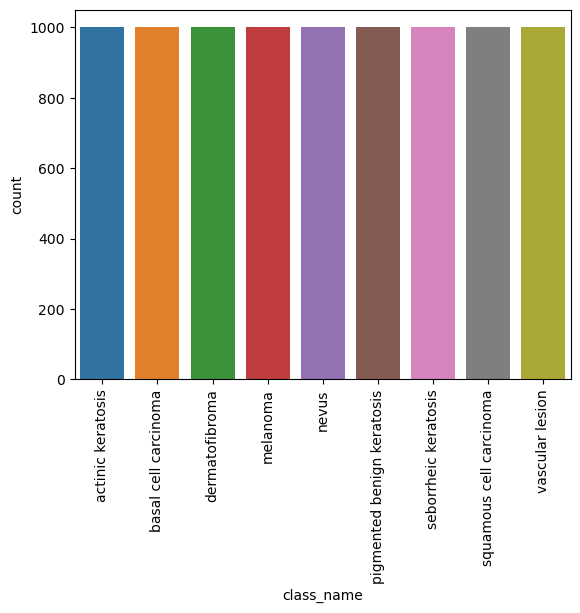

In [35]:
num_classes = len(class_names)
total = 0
all_count = []
class_name = []

for i in range(num_classes):
  count = len(list(output_dir.glob(class_names[i]+'/output/*.jpg')))
  total += count
print("total training image count = {} \n".format(total))
print("-------------------------------------")
for i in range(num_classes):
  count = len(list(output_dir.glob(class_names[i]+'/output/*.jpg')))
  print("Class name = ",class_names[i])
  print("count      = ",count)
  print("proportion = ",count/total)
  print("-------------------------------------")
  all_count.append(count)
    
  class_name.append(class_names[i])
temp_df = pd.DataFrame(list(zip(all_count, class_name)), columns = ['count', 'class_name'])
sns.barplot(data=temp_df, y="count", x="class_name")
plt.xticks(rotation=90)
plt.show()

In [36]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9000 files belonging to 9 classes.
Using 7200 files for training.


In [37]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9000 files belonging to 9 classes.
Using 1800 files for validation.


In [38]:
print(train_ds.class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [39]:
num_classes = 9
model = Sequential([layers.experimental.preprocessing.Rescaling(1.0/255,input_shape=(img_height,img_width,3))])

model.add(Conv2D(32, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(128, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.15))

model.add(Conv2D(256, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.20))

model.add(Conv2D(512, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(units=num_classes, activation= 'softmax'))

In [40]:
opt = Adam(lr=0.001)
model.compile(optimizer= opt,
              loss = SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
225/225 [==============================] - 189s 831ms/step - loss: 1.8579 - accuracy: 0.2624 - val_loss: 1.5610 - val_accuracy: 0.4100
Epoch 2/25
225/225 [==============================] - 414s 2s/step - loss: 1.3350 - accuracy: 0.4910 - val_loss: 1.3038 - val_accuracy: 0.4856
Epoch 3/25
225/225 [==============================] - 6557s 29s/step - loss: 1.0605 - accuracy: 0.5971 - val_loss: 0.9362 - val_accuracy: 0.6678
Epoch 4/25
225/225 [==============================] - 181s 805ms/step - loss: 0.7195 - accuracy: 0.7421 - val_loss: 0.5122 - val_accuracy: 0.8111
Epoch 5/25
225/225 [==============================] - 288s 1s/step - loss: 0.4684 - accuracy: 0.8382 - val_loss: 0.3673 - val_accuracy: 0.8672
Epoch 6/25
225/225 [==============================] - 192s 853ms/step - loss: 0.2443 - accuracy: 0.9151 - val_loss: 0.2342 - val_accuracy: 0.9217
Epoch 7/25
225/225 [==============================] - 3653s 16s/step - loss: 0.1976 - accuracy: 0.9343 - val_loss: 0.0959 - val_acc

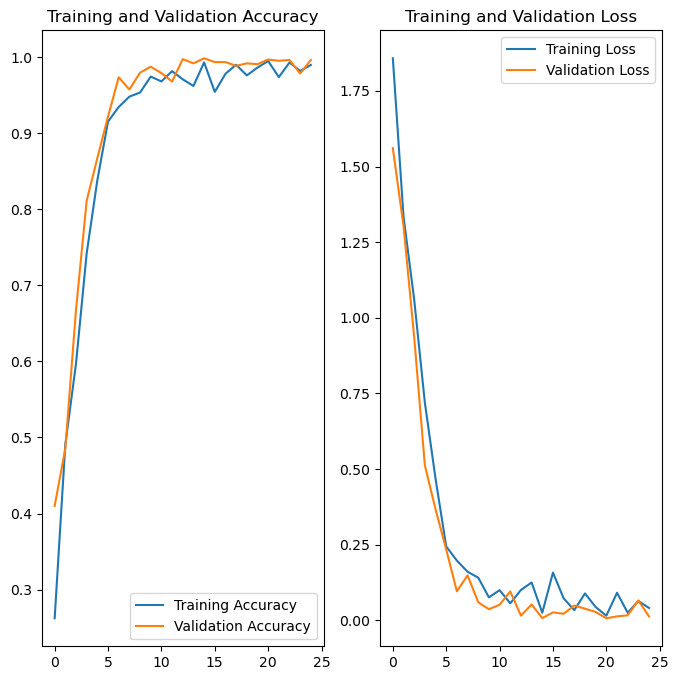

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [43]:
#Create a file to save models
top_model_weights_path = '/kaggle/working/cnn_fc_model.h5'
model.save_weights(top_model_weights_path)

In [44]:
(eval_loss, eval_accuracy) = model.evaluate(test_ds, batch_size=batch_size, \
                                            verbose=1)

5/5 [==============================] - 3s 151ms/step - loss: 4.2574 - accuracy: 0.5349


In [45]:
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100)) 
print("[INFO] Loss: {}".format(eval_loss)) 

[INFO] accuracy: 53.49%
[INFO] Loss: 4.257444858551025
